`Listing 5.1 Adding white noise channels or all-zeros channels to MNIST`

In [4]:
from tensorflow.keras.datasets import mnist
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
train_images_with_noise_channels = np.concatenate(
 [train_images, np.random.random((len(train_images), 784))], axis=1)
train_images_with_zeros_channels = np.concatenate(
 [train_images, np.zeros((len(train_images), 784))], axis=1)

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
def get_model():
    model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")])
    model.compile(optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])
    return model

In [6]:
model = get_model()
history_noise = model.fit(
 train_images_with_noise_channels, train_labels,
 epochs=10,
 batch_size=128,
 validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 9s 23ms/step - loss: 0.6175 - accuracy: 0.8136 - val_loss: 0.2921 - val_accuracy: 0.9128
Epoch 2/10
375/375 [==============================] - 8s 20ms/step - loss: 0.2544 - accuracy: 0.9212 - val_loss: 0.2222 - val_accuracy: 0.9339
Epoch 3/10
375/375 [==============================] - 10s 27ms/step - loss: 0.1662 - accuracy: 0.9482 - val_loss: 0.1705 - val_accuracy: 0.9482
Epoch 4/10
375/375 [==============================] - 10s 28ms/step - loss: 0.1183 - accuracy: 0.9630 - val_loss: 0.1360 - val_accuracy: 0.9598
Epoch 5/10
375/375 [==============================] - 13s 35ms/step - loss: 0.0864 - accuracy: 0.9730 - val_loss: 0.1363 - val_accuracy: 0.9613
Epoch 6/10
375/375 [==============================] - 11s 28ms/step - loss: 0.0631 - accuracy: 0.9800 - val_loss: 0.1764 - val_accuracy: 0.9507
Epoch 7/10
375/375 [==============================] - 8s 22ms/step - loss: 0.0473 - accuracy: 0.9844 - val_loss: 0.1470 - val_accuracy: 0.

In [7]:
model = get_model()
history_zeros = model.fit(
 train_images_with_zeros_channels, train_labels,
 epochs=10,
 batch_size=128,
 validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 11s 24ms/step - loss: 0.2969 - accuracy: 0.9150 - val_loss: 0.1547 - val_accuracy: 0.9550
Epoch 2/10
375/375 [==============================] - 8s 21ms/step - loss: 0.1249 - accuracy: 0.9638 - val_loss: 0.1156 - val_accuracy: 0.9641
Epoch 3/10
375/375 [==============================] - 7s 18ms/step - loss: 0.0812 - accuracy: 0.9756 - val_loss: 0.0888 - val_accuracy: 0.9720
Epoch 4/10
375/375 [==============================] - 8s 21ms/step - loss: 0.0594 - accuracy: 0.9821 - val_loss: 0.0788 - val_accuracy: 0.9765
Epoch 5/10
375/375 [==============================] - 7s 19ms/step - loss: 0.0442 - accuracy: 0.9871 - val_loss: 0.0850 - val_accuracy: 0.9744
Epoch 6/10
375/375 [==============================] - 7s 19ms/step - loss: 0.0334 - accuracy: 0.9901 - val_loss: 0.0743 - val_accuracy: 0.9777
Epoch 7/10
375/375 [==============================] - 8s 22ms/step - loss: 0.0255 - accuracy: 0.9927 - val_loss: 0.0754 - val_accuracy: 0.978

`Listing 5.3 Plotting a validation accuracy comparison`

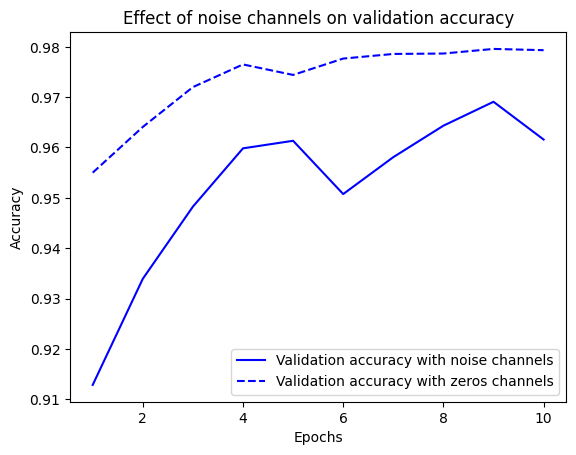

In [8]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
 label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
 label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

`Listing 5.4 Fitting an MNIST model with randomly shuffled labels`

In [9]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

In [10]:
model = keras.Sequential([
 layers.Dense(512, activation="relu"), layers.Dense(10, activation="softmax")
])

In [11]:
model.compile(optimizer="rmsprop",
 loss="sparse_categorical_crossentropy",
 metrics=["accuracy"])

In [12]:
model.fit(train_images, random_train_labels,
 epochs=100,
 batch_size=128,
 validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 4s 11ms/step - loss: 2.3138 - accuracy: 0.1048 - val_loss: 2.3061 - val_accuracy: 0.1019
Epoch 2/100
375/375 [==============================] - 5s 13ms/step - loss: 2.2992 - accuracy: 0.1179 - val_loss: 2.3090 - val_accuracy: 0.1020
Epoch 3/100
375/375 [==============================] - 4s 10ms/step - loss: 2.2899 - accuracy: 0.1292 - val_loss: 2.3187 - val_accuracy: 0.1002
Epoch 4/100
375/375 [==============================] - 4s 11ms/step - loss: 2.2770 - accuracy: 0.1404 - val_loss: 2.3304 - val_accuracy: 0.0967
Epoch 5/100
375/375 [==============================] - 5s 13ms/step - loss: 2.2619 - accuracy: 0.1550 - val_loss: 2.3443 - val_accuracy: 0.1044
Epoch 6/100
375/375 [==============================] - 4s 11ms/step - loss: 2.2430 - accuracy: 0.1658 - val_loss: 2.3527 - val_accuracy: 0.1016
Epoch 7/100
375/375 [==============================] - 4s 10ms/step - loss: 2.2191 - accuracy: 0.1806 - val_loss: 2.3656 - val_accuracy: